In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df=pd.read_csv("fraudTrain.CSV")
test_df=pd.read_csv("fraudTest.CSV")

In [4]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
train_df.shape

(1296675, 23)

In [8]:
fraud = train_df["is_fraud"].value_counts()
print("Yes it is fraud: ",fraud[1])
print("No it is not fraud: ",fraud[0])

Yes it is fraud:  7506
No it is not fraud:  1289169


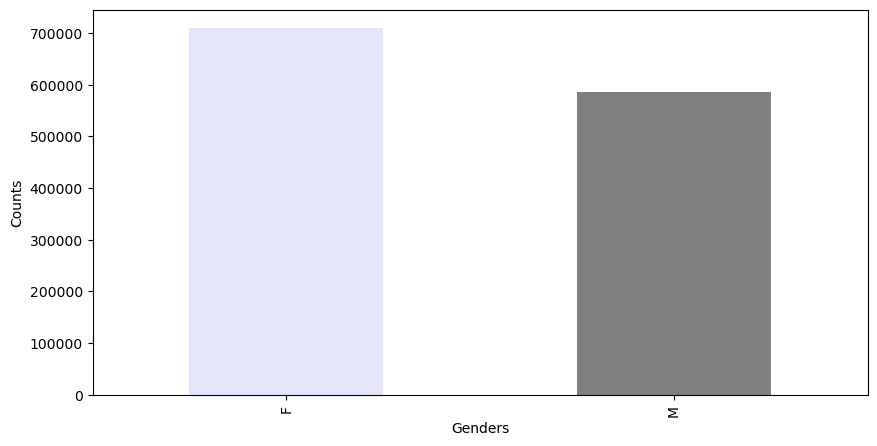

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5)) 
train_df.groupby('gender')['is_fraud'].count().plot(kind='bar', ax=ax, color=['lavender', 'grey'])
ax.set_ylabel("Counts")
ax.set_xlabel("Genders")
plt.show()


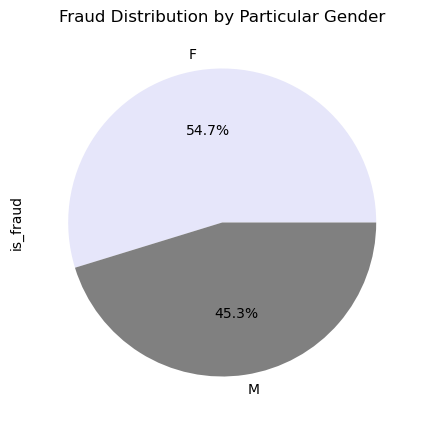

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
train_df.groupby('gender')['is_fraud'].count().plot(kind='pie', ax=ax, colors=['lavender', 'grey'], autopct='%1.1f%%')
ax.set_title("Fraud Distribution by Particular Gender")
plt.show()

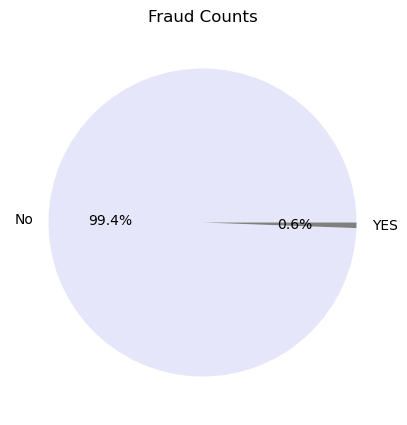

In [34]:
is_fraud = train_df["is_fraud"].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(is_fraud, labels=["No", "YES"], colors=['lavender', 'grey'], autopct="%1.1f%%")
plt.title("Fraud Counts")
plt.show()

FEATURE EXTRACTION

In [37]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'],format='mixed')
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'],format='mixed')
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour
train_df['month'] = train_df['trans_date_trans_time'].dt.month
test_df['month'] = test_df['trans_date_trans_time'].dt.month
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


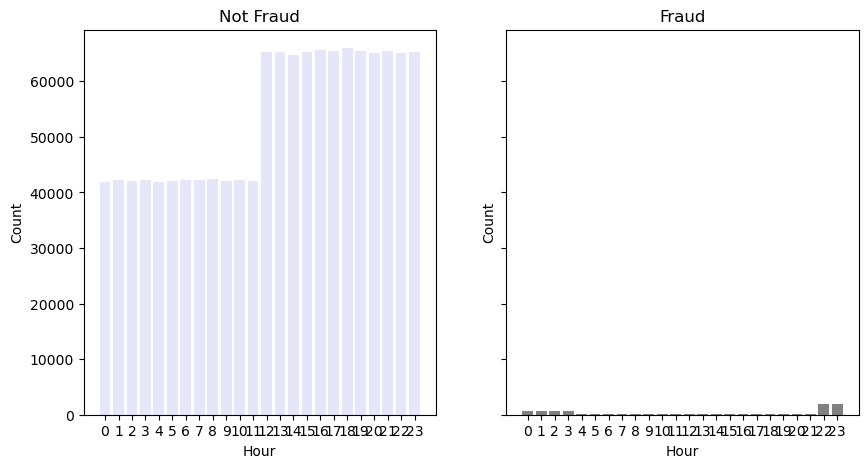

In [48]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
colors = ['lavender', 'grey']
titles = ["Not Fraud", "Fraud"]
for i, fraud_status in enumerate([0, 1]):
    fraud_counts = train_df[train_df["is_fraud"] == fraud_status]['hour'].value_counts().sort_index()
    axes[i].bar(fraud_counts.index, fraud_counts.values, color=colors[i])
    axes[i].set_title(titles[i])
    axes[i].set_xticks(np.arange(24))
    axes[i].set_xlabel("Hour")
    axes[i].set_ylabel("Count")
plt.show()


DATA PRE-PROCESSING

In [50]:
unique_count = len(train_df['trans_num'].unique())
print("Total number of unique transactions:", unique_count)

Total number of unique transactions: 1296675


In [51]:
drop_columns= [ 'trans_date_trans_time', 'cc_num', 'city','street', 'state','zip','dob', 'trans_num', 'unix_time']
train_df = train_df.drop(drop_columns, axis=1)
test_df = test_df.drop(drop_columns, axis=1)
train_df.head()

,Unnamed: 0,merchant,category,amt,first,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1
2,2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1
3,3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0,1
4,4,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0,1


In [53]:
train_df['merchant'] = train_df['merchant'].apply(lambda x : x.replace('fraud_',''))
train_df.head()

,Unnamed: 0,merchant,category,amt,first,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,1,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1
2,2,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1
3,3,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0,1
4,4,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0,1


DATA ENCODING

In [6]:
%pip install category-encoders


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.7 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.7 kB ? eta -:--:--
   ------------------- -------------------- 41.0/85.7 kB 279.3 kB/s eta 0:00:01
   -------------------------------------- - 81.9/85.7 kB 459.5 kB/s eta 0:00:01
   ---------------------------------------- 85.7/85.7 kB 438.7 kB/s eta 0:00:00
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from category_encoders.woe import WOEEncoder
train_df = pd.read_csv("fraudTrain.CSV")
train_df['gender'] = train_df['gender'].map({'F': 0, 'M': 1})
encoder = WOEEncoder()
for col in ['job', 'merchant', 'category', 'lat', 'last']:
    train_df[col] = encoder.fit_transform(train_df[col], train_df['is_fraud'])
print(train_df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  merchant  category  \
0           0   2019-01-01 00:00:18  2703186189652095  0.959326  0.924914   
1           1   2019-01-01 00:00:44      630423337322  0.663187  0.898799   
2           2   2019-01-01 00:00:51    38859492057661 -0.790166 -0.847622   
3           3   2019-01-01 00:01:16  3534093764340240 -0.416817 -0.209382   
4           4   2019-01-01 00:03:06   375534208663984 -0.277905 -0.611091   

      amt      first      last  gender                        street  ...  \
0    4.97   Jennifer -2.469513       0                561 Perry Cove  ...   
1  107.23  Stephanie -0.673638       0  43039 Riley Greens Suite 393  ...   
2  220.11     Edward  0.433257       1      594 White Dale Suite 530  ...   
3   45.00     Jeremy  0.148996       1   9443 Cynthia Court Apt. 038  ...   
4   41.96      Tyler  0.423436       1              408 Bradley Rest  ...   

       lat      long  city_pop       job         dob  \
0  36.0788  -81.17

DATA SAMPLING

In [15]:
print(X_train.dtypes)


Unnamed: 0      int64
cc_num          int64
merchant      float64
category      float64
amt           float64
first          object
last          float64
gender          int64
street         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job           float64
dob            object
trans_num      object
unix_time       int64
merch_lat     float64
merch_long    float64
year            int32
month           int32
day             int32
hour            int32
dtype: object


In [16]:
X = pd.get_dummies(X, drop_first=True) 

In [21]:
import pandas as pd
train_df = pd.read_csv("fraudTrain.CSV")
if 'trans_num' in X.columns:
    encoder = LabelEncoder()
    X['trans_num'] = encoder.fit_transform(X['trans_num'])
else:
    print("Column 'trans_num' not found in dataset!")

Column 'trans_num' not found in dataset!


In [28]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Downsampling
No_class = train_df[train_df["is_fraud"] == 0]
Yes_class = train_df[train_df["is_fraud"] == 1]

No_class_downsampled = resample(No_class, replace=False, n_samples=len(Yes_class), random_state=42)
down_samples = pd.concat([Yes_class, No_class_downsampled], axis=0)

# Convert non-numeric columns (e.g., dates) to numeric
for col in down_samples.select_dtypes(include=['object']).columns:
    down_samples[col] = pd.factorize(down_samples[col])[0]  # Encodes categorical/text data

# Splitting features and labels
X = down_samples.drop("is_fraud", axis=1)
y = down_samples["is_fraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


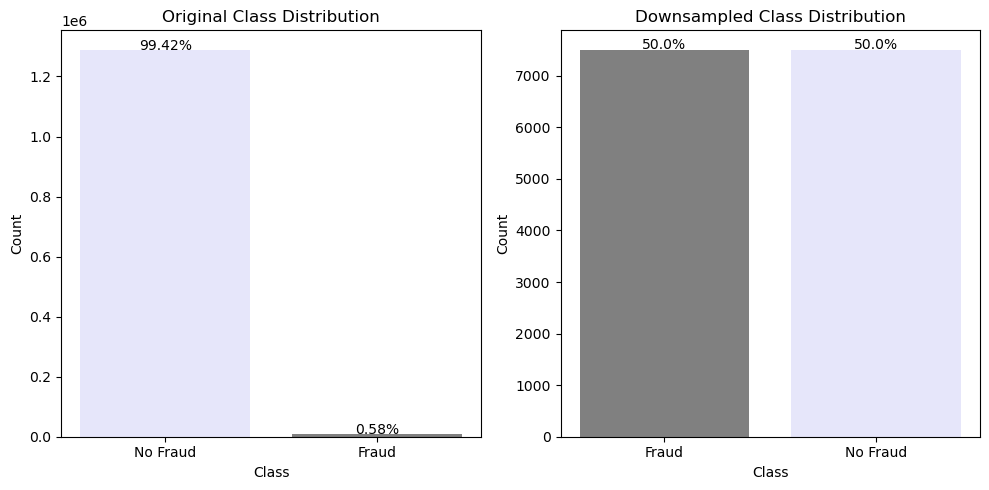

In [29]:
import matplotlib.pyplot as plt
original_counts = train_df["is_fraud"].value_counts()
downsampled_counts = down_samples["is_fraud"].value_counts()
original_percent = (original_counts / len(train_df) * 100).round(2)
downsampled_percent = (downsampled_counts / len(down_samples) * 100).round(2)
def plot_class_distribution(counts, percentages, title, subplot):
    plt.subplot(1, 2, subplot)
    bars = plt.bar(counts.index, counts.values, color=['lavender', 'grey'])
    for bar, pct in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{pct}%', ha='center')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(counts.index, ['No Fraud', 'Fraud'])
plt.figure(figsize=(10, 5))
plot_class_distribution(original_counts, original_percent, 'Original Class Distribution', 1)
plot_class_distribution(downsampled_counts, downsampled_percent, 'Downsampled Class Distribution', 2)
plt.tight_layout()
plt.show()

LOGISTIC REGRESSION MODEL

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1486
           1       1.00      1.00      1.00      1517

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

Logistic Regression accuracy is: 100.00%


DECISION TREE CLASSIFIER

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(X_train, y_train)
predict_ID3 = DT.predict(X_test)
print(classification_report(y_test, predict_ID3))
DT_accuracy = accuracy_score(predict_ID3,y_test)
print('DT model accuracy is: {:.2f}%'.format(DT_accuracy*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1486
           1       1.00      1.00      1.00      1517

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

DT model accuracy is: 99.97%


RANDOM FOREST CLASSIFIER

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)
predict_RF = RF.predict(X_test)
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1486
           1       1.00      1.00      1.00      1517

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

Random Forest model accuracy is: 100.00%


In [36]:
Algorithms = ['Logistic Regression','Decision Tree', 'Random Forest']
accuracy = [LR_accuracy, DT_accuracy, RF_accuracy]
FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})
FinalResult

,Algorithm,Accuracy
0,Logistic Regression,1.000000
1,Decision Tree,0.999667
2,Random Forest,1.000000


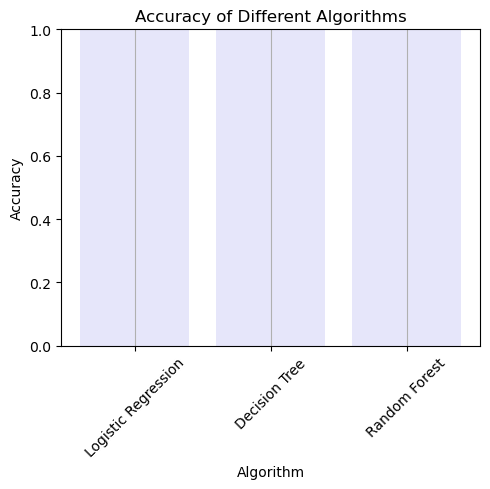

In [41]:
plt.figure(figsize=(5, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color='lavender')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  
plt.xticks(rotation=45) 
plt.grid(axis='x')  
plt.tight_layout()  
plt.show()